In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1d97b893191bef95aa2cd367ca983128


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | itarema
Processing Record 6 of Set 1 | verkhnyaya inta
Processing Record 7 of Set 1 | cardston
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | suluq
Processing Record 12 of Set 1 | marzuq
Processing Record 13 of Set 1 | palana
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | palabuhanratu
City not found. Skipping...
Pr

Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | muvattupula
Processing Record 40 of Set 4 | papara
Processing Record 41 of Set 4 | madang
Processing Record 42 of Set 4 | kaoma
Processing Record 43 of Set 4 | pindwara
Processing Record 44 of Set 4 | vernon
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | huarmey
Processing Record 47 of Set 4 | hayden
Processing Record 48 of Set 4 | big bend
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | west bay
Processing Record 3 of Set 5 | luau
Processing Record 4 of Set 5 | umm kaddadah
Processing Record 5 of Set 5 | pangai
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | fort-shevchenko
Processing Record 8 of Set 5 | mogadishu
Processing Record 9 of Set 5 | rio gallegos
Processing Record 10 of Set 5 | fairbanks

Processing Record 29 of Set 8 | souillac
Processing Record 30 of Set 8 | pokhara
Processing Record 31 of Set 8 | norman wells
Processing Record 32 of Set 8 | bud
Processing Record 33 of Set 8 | mackenzie
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | lluta
Processing Record 36 of Set 8 | saleaula
City not found. Skipping...
Processing Record 37 of Set 8 | villa carlos paz
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | ca mau
Processing Record 41 of Set 8 | pendleton
Processing Record 42 of Set 8 | sutysky
Processing Record 43 of Set 8 | aden
Processing Record 44 of Set 8 | khandyga
Processing Record 45 of Set 8 | krasnoselkup
Processing Record 46 of Set 8 | lazarev
Processing Record 47 of Set 8 | iqaluit
Processing Record 48 of Set 8 | dengzhou
Processing Record 49 of Set 8 | inuvik
Processing Record 50 of Set 8 | singaraja
Processing Record 1 of Set 9 | kodinsk
Processing Record 2 

Processing Record 17 of Set 12 | koslan
Processing Record 18 of Set 12 | mamu kanjan
Processing Record 19 of Set 12 | warwick
Processing Record 20 of Set 12 | quelimane
Processing Record 21 of Set 12 | callaway
Processing Record 22 of Set 12 | muravlenko
Processing Record 23 of Set 12 | barra do bugres
Processing Record 24 of Set 12 | wasilla
Processing Record 25 of Set 12 | comarapa
Processing Record 26 of Set 12 | leshukonskoye
Processing Record 27 of Set 12 | oliveira dos brejinhos
Processing Record 28 of Set 12 | mocambique
City not found. Skipping...
Processing Record 29 of Set 12 | pacocha
Processing Record 30 of Set 12 | warrenton
Processing Record 31 of Set 12 | vavoua
Processing Record 32 of Set 12 | talcahuano
Processing Record 33 of Set 12 | vostok
Processing Record 34 of Set 12 | marsh harbour
Processing Record 35 of Set 12 | vicenza
Processing Record 36 of Set 12 | ferrol
Processing Record 37 of Set 12 | qasigiannguit
Processing Record 38 of Set 12 | bolshoy tsaryn
City no

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,84.31,70,24,2.95,PG,2021-03-21 21:53:16
1,Beringovskiy,63.0500,179.3167,0.77,78,94,7.56,RU,2021-03-21 21:53:17
2,Pangnirtung,66.1451,-65.7125,-6.39,81,81,2.55,CA,2021-03-21 21:53:17
3,Tasiilaq,65.6145,-37.6368,26.60,74,21,11.50,GL,2021-03-21 21:53:17
4,Itarema,-2.9248,-39.9167,79.03,79,93,11.25,BR,2021-03-21 21:53:18
5,Verkhnyaya Inta,65.9811,60.3094,7.95,85,85,7.18,RU,2021-03-21 21:53:18
6,Cardston,49.2000,-113.3019,44.60,31,99,17.27,CA,2021-03-21 21:53:18
7,Saint George,37.1041,-113.5841,62.01,26,1,8.05,US,2021-03-21 21:51:01
8,Nikolskoye,59.7035,30.7861,32.00,74,75,22.37,RU,2021-03-21 21:53:19
9,Flin Flon,54.7682,-101.8650,30.20,43,20,17.27,CA,2021-03-21 21:53:19


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2021-03-21 21:53:16,-2.0226,147.2712,84.31,70,24,2.95
1,Beringovskiy,RU,2021-03-21 21:53:17,63.0500,179.3167,0.77,78,94,7.56
2,Pangnirtung,CA,2021-03-21 21:53:17,66.1451,-65.7125,-6.39,81,81,2.55
3,Tasiilaq,GL,2021-03-21 21:53:17,65.6145,-37.6368,26.60,74,21,11.50
4,Itarema,BR,2021-03-21 21:53:18,-2.9248,-39.9167,79.03,79,93,11.25
...,...,...,...,...,...,...,...,...,...
576,Qeshm,IR,2021-03-21 21:56:15,26.9581,56.2719,75.20,73,0,4.61
577,Luanda,AO,2021-03-21 21:55:09,-8.8368,13.2343,78.80,89,75,9.22
578,Los Algarrobos,PA,2021-03-21 21:56:15,8.5000,-82.4333,89.60,58,20,12.66
579,Gibara,CU,2021-03-21 21:56:16,21.1097,-76.1317,84.20,61,75,18.41


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

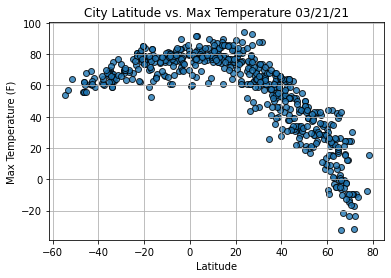

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

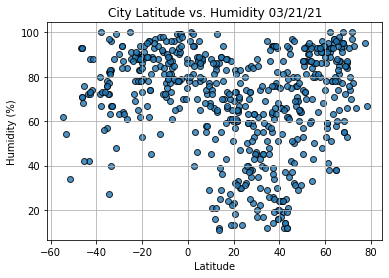

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

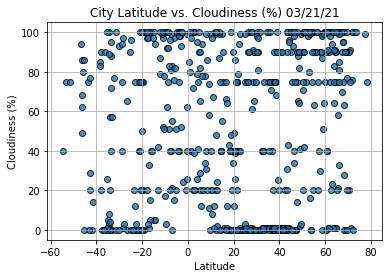

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

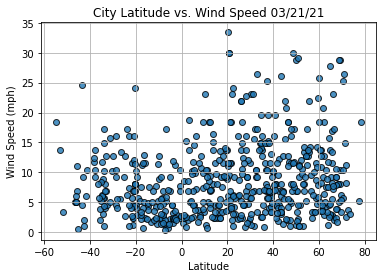

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()